## Additional Learning Resources
Refer to [scikit-learn documentation](https://scikit-learn.org/stable/) and the [Pandas user guide](https://pandas.pydata.org/docs/) for detailed explanations of the functions used in this notebook.
For a quick refresher on splitting data:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```


# Regularization

### 🎯 Goal: reduce overfitting by applying Lasso and Ridge to your model

### Task 1:

Let's try to create some data that roughly follows this equation:

$$ y = \sqrt x $$

And add in some random normally-distributed noise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [5]:
X = np.arange(0, 100, 2)
y = np.sqrt(X) + np.random.normal(0, 1, len(X))

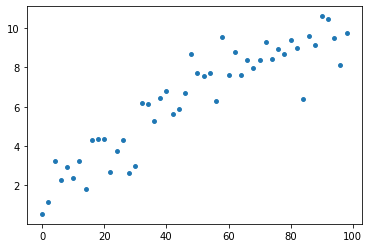

In [6]:
plt.scatter(X, y, s=15)

---

### Task 2:

Let's intentionally overfit — create a model that focuses too much on training examples.

In [9]:
X = X.reshape(-1, 1)

In [10]:
X.shape

(50, 1)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=13) 
m = LinearRegression() 

X_poly = poly.fit_transform(X) 

m.fit(X_poly, y)
y_pred = m.predict(X_poly)

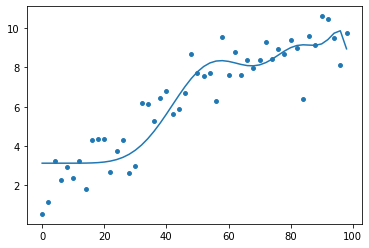

In [20]:
plt.scatter(X, y, s=15)
plt.plot(X, y_pred)

---

### Task 3:

Let's look at another case — generate similar data but purposely throw in some outliers.

In [21]:
X = np.linspace(0, 15, 15).reshape(-1, 1)
y = np.sqrt(X) + np.random.normal(0, 1, len(X[0]))
### Create some outliers intentionally
y[2] = 4
y[8] = 1

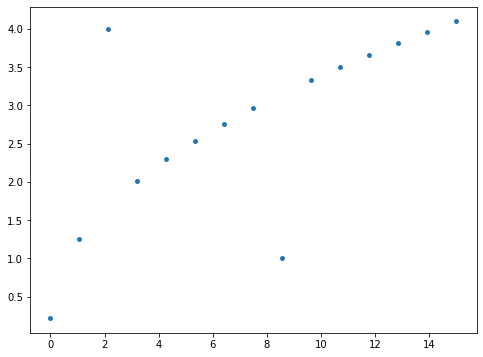

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=15)

---

### Task 4:

Observe the effect of regularization

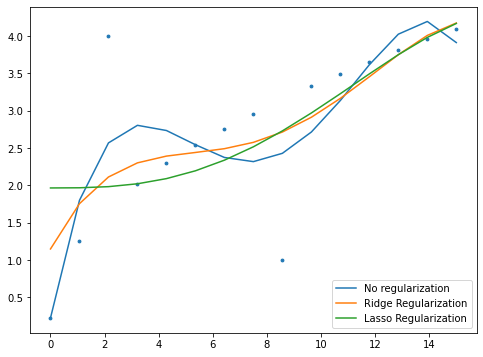

In [29]:
### Make model unnecessarily complex
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

### Reduce the complexity through regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
m = LinearRegression() 
m_ridge = Ridge(alpha=2.0)
m_lasso = Lasso(alpha=2.0)

m.fit(X_poly, y)       
m_ridge.fit(X_poly, y)  
m_lasso.fit(X_poly, y)  

ypred = m.predict(X_poly)
ypred_ridge = m_ridge.predict(X_poly)
ypred_lasso = m_lasso.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=8)
plt.plot(X, ypred, label='No regularization')
plt.plot(X, ypred_ridge, label='Ridge Regularization')
plt.plot(X, ypred_lasso, label='Lasso Regularization')
plt.legend()

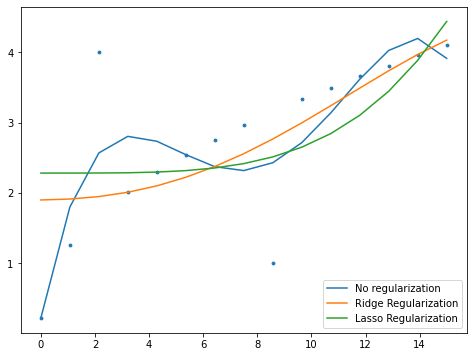

In [31]:
### Make model unnecessarily complex
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

### Reduce the complexity through regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
m = LinearRegression() 
m_ridge = Ridge(alpha=10.0)
m_lasso = Lasso(alpha=10.0)

m.fit(X_poly, y)       
m_ridge.fit(X_poly, y)  
m_lasso.fit(X_poly, y)  

ypred = m.predict(X_poly)
ypred_ridge = m_ridge.predict(X_poly)
ypred_lasso = m_lasso.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=8)
plt.plot(X, ypred, label='No regularization')
plt.plot(X, ypred_ridge, label='Ridge Regularization')
plt.plot(X, ypred_lasso, label='Lasso Regularization')
plt.legend()

---

In [25]:
m.coef_

array([[ 0.00000000e+00,  1.94229822e+00, -4.87813827e-01,
         4.59704826e-02, -1.39926564e-03]])

In [26]:
m_ridge.coef_

array([[ 0.00000000e+00,  7.11024227e-01, -1.49197679e-01,
         1.35917438e-02, -3.93900478e-04]])

In [27]:
m_lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.96138311e-03,
       -8.72354116e-05])